In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Checking GPU

In [ ]:
!nvidia-smi

Sun Mar 13 12:05:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Changing the working directory 

In [2]:
%cd /content/drive/My Drive/Computer_vision/trafficsignYv3

/content/drive/My Drive/Computer_vision/trafficsignYv3


### Getting the data

```
# Here we are training our model to detect 4 traffic signs and the data and labels is downloaded from the below link
https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4
```



'LabelImg' is one of the widely used annotating tool to annotate on custom data 

In [ ]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4" -O ts.zip

--2022-03-09 09:02:26--  https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://sblnsa.db.files.1drv.com/y4mMJYENUWfQqaKsUKljzmradlkCllNXiEtSVy4i-2yeFgtLlCEoH3Zy8D3BkUpASFbrsw8Z9qlbyJhJtS3YbNTvdyt5E2Iq4JJZEULc25jy4SonSEbYLoYXlpc3YWCDyaZ9fPYayF7xiTHDi1oXXBiT7XbBihzlLt6Bo3MYNLATNf5ujssF7HAefuQ5HO8lS8Z6HPq3_NoMQIwJQ05NojhZw/ts.zip?download&psid=1 [following]
--2022-03-09 09:02:28--  https://sblnsa.db.files.1drv.com/y4mMJYENUWfQqaKsUKljzmradlkCllNXiEtSVy4i-2yeFgtLlCEoH3Zy8D3BkUpASFbrsw8Z9qlbyJhJtS3YbNTvdyt5E2Iq4JJZEULc25jy4SonSEbYLoYXlpc3YWCDyaZ9fPYayF7xiTHDi1oXXBiT7XbBihzlLt6Bo3MYNLATNf5ujssF7HAefuQ5HO8lS8Z6HPq3_NoMQIwJQ05NojhZw/ts.zip?download&psid=1
Resolving sblnsa.db.files.1drv.com (sblnsa.db.files.1drv.com)... 13.107.4

In [ ]:
!unzip ts.zip

Archive:  ts.zip
  inflating: train.txt               
   creating: ts/
  inflating: ts/00000.jpg            
  inflating: ts/00000.txt            
  inflating: ts/00001.jpg            
  inflating: ts/00001.txt            
  inflating: ts/00002.jpg            
  inflating: ts/00002.txt            
  inflating: ts/00003.jpg            
  inflating: ts/00003.txt            
  inflating: ts/00004.jpg            
  inflating: ts/00004.txt            
  inflating: ts/00005.jpg            
  inflating: ts/00005.txt            
  inflating: ts/00006.jpg            
  inflating: ts/00006.txt            
  inflating: ts/00007.jpg            
  inflating: ts/00007.txt            
  inflating: ts/00008.jpg            
  inflating: ts/00008.txt            
  inflating: ts/00009.jpg            
  inflating: ts/00009.txt            
  inflating: ts/00010.jpg            
  inflating: ts/00010.txt            
  inflating: ts/00011.jpg            
  inflating: ts/00011.txt            
  inflating: ts/

In [ ]:
!rm -f ts.zip

### Cloning the datknet repository

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.05 MiB | 8.47 MiB/s, done.
Resolving deltas: 100% (10357/10357), done.
Checking out files: 100% (2050/2050), done.


In [3]:
%cd darknet/

/content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet


In [ ]:
!ls

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


Edit the following in the make file in darknetfolder
'~/darknet/Makefile'
GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
OPENMP=1
LIBSO=1


After making the above changes run the Makefile

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -fopenmp -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iterati

The data folder in darknet must contain the following

*   Directory containing images and its respective labels
*   '.names' file with all the class names 
*   'train.txt' and 'test.txt'
* '.data' file and should have number of classes, path to 'train', 'test' and '.names' files and a path where the traines weights to be saved (generally a back up folder is given from darknet folder)



In [ ]:
!ls data/

classes.names  data.data  labels  test.txt  train.txt  ts


In [4]:
pwd

'/content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet'

In [ ]:
%cd custom_weights/

/content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet/custom_weights


### Downloading the darknet weights from below link
' https://pjreddie.com/media/files/darknet53.conv.74 '

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-03-09 09:41:27--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  22.5MB/s    in 7.7s    

2022-03-09 09:41:36 (20.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
%cd /content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet

/content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet


In [ ]:
pwd

'/content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet'

Before moving further give the execute permission to the darknet directory 

In [7]:
!chmod +x ./darknet

Before training the data we need to make below changes in .cfg file in darknet

*   Change batch=64 to 1 and subdivision=16 to 1(while testing)
*   width=416 and height=416
*   max_batches=6000 upto 3 classes. For more than 3 classes "No.of classes X 2000" (in this case 4 X 2000=8000) as we have 4 classes
*Steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch
steps are steps=7200,6400 (90% of 8000 and 80% of 8000)
* Change the number of filter in convolution layer above every yolo layer as per the calculation : (classes+5)3

In [ ]:
!./darknet detector train data/data.data cfg/yolov3_cust.cfg custom_weights/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.872117), count: 2, class_loss = 0.000519, iou_loss = 0.014138, total_loss = 0.014657 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.806467), count: 4, class_loss = 0.000026, iou_loss = 0.096799, total_loss = 0.096825 
 total_bbox = 431320, rewritten_bbox = 0.133080 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.925012), count: 1, class_loss = 0.000069, iou_loss = 0.005225, total_loss = 0.005294 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.870719), count: 5, class_loss = 0.000179, iou_loss = 0.056631, total_loss = 0.056809 
 total_bbox = 431326, rewritten_bbox = 0.133078 % 
v3 (m

In [5]:
pwd

'/content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet'

### Testing the Model

In [8]:
image_path='data/test.jpg'
!./darknet detector test data/data.data cfg/yolov3_cust.cfg backup/yolov3_cust_4000.weights {image_path} -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104

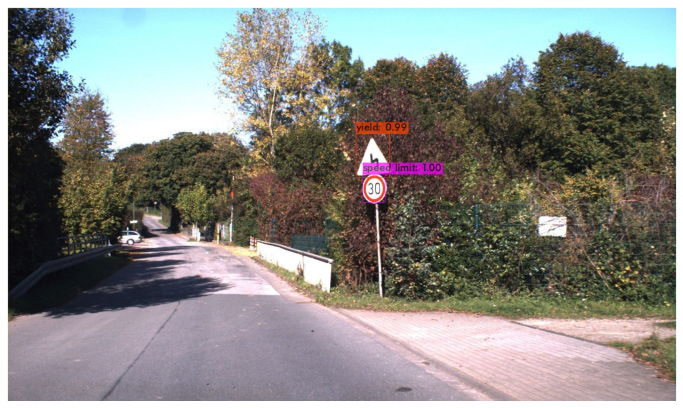

In [9]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [ ]:
pwd

'/content/drive/MyDrive/Computer_vision/trafficsignYv3/darknet'

### Testing on a Video

In [10]:
video_path = "data/tes.mp4"
!./darknet detector demo data/data.data cfg/yolov3_cust.cfg backup/yolov3_cust_4000.weights -dont_show data/tes.mp4 -out_filename data/result2.avi

Streaming output truncated to the last 5000 lines.
speed limit: 100% 

FPS:59.9 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:60.0 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:60.1 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:60.0 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.8 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.9 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.7 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.6 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

other: 30% 
speed limit: 100% 

FPS:59.5 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.2 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.1 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.1 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.3 	 AVG_FPS:58.4

 cvWriteFrame 
Objects:

speed limit: 100% 

FPS:59.